In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.io as sio
import seaborn as sns
import statsmodels.api as sm
import funcs as func
import matplotlib.pyplot as plt
import sys
import pdb
import glob
import pickle

import sys
sys.path.append('/home/jyotika/Utils/hddm/')

import hddm

data_dir = "./Data/Y_maze/Decision_times/"
data_target_dir = "./Data/processed_data/Y_maze/"
figure_dir = "./Figures/Y_maze/"

plt.rcParams["figure.facecolor"] = "w"

In [2]:
all_conflicts = pd.read_csv(data_target_dir+"all_experiments_df_with_DTs.csv")

In [3]:
all_conflicts

,Unnamed: 0,level_0,index,conflict,condition,volatility,event_marker,block,reward_probability,trial_length_range,session,block_num,trial_num,chosen_action,rewarded,optimal_action,RT(ms),conflict + volatility
0,0,0,0,Low,Control,High,8,left,10-90,10-20,0,1,0,right,unrewarded,0.0,606,Low - High
1,1,1,1,Low,Control,High,8,left,10-90,10-20,0,1,1,right,unrewarded,0.0,844,Low - High
2,2,2,2,Low,Control,High,1,left,10-90,10-20,0,1,2,left,rewarded,1.0,1331,Low - High
3,3,3,3,Low,Control,High,1,left,10-90,10-20,0,1,3,left,rewarded,1.0,667,Low - High
4,4,4,4,Low,Control,High,8,left,10-90,10-20,0,1,4,right,unrewarded,0.0,244,Low - High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38525,38525,5475,9326,No,Control,High,4,right,0-90,10-20,11,8,0,left,unrewarded,0.0,1348,No - High
38526,38526,5476,9327,No,Control,High,5,right,0-90,10-20,11,8,1,right,rewarded,1.0,457,No - High
38527,38527,5477,9328,No,Control,High,6,right,0-90,10-20,11,8,2,right,unrewarded,1.0,1369,No - High
38528,38528,5478,9329,No,Control,High,4,right,0-90,10-20,11,8,3,left,unrewarded,0.0,1055,No - High


In [4]:
all_conflicts['stim'] = all_conflicts["conflict + volatility"].copy()

In [5]:
seed = np.random.randint(0,99999999,1)[0]
print(seed)
np.random.seed(seed)


n_samples,n_burn,n_thin = 10000, 1000, 0
n_effective_samples = n_samples - n_burn

# hddm_data = pd.DataFrame()

hddm_data = all_conflicts.copy()

# Takes forever with the whole data, hence trying with subset of the data
# for grp in all_conflicts.groupby(["conflict","volatility"]):
#     # Randomly choose 1 sessions and 5 consecutive trials 
#     num_sessions = np.unique(grp[1]["session"])
#     print(num_sessions)
#     ind = np.random.choice(num_sessions,1)
#     ind_trials = np.unique(grp[1].loc[grp[1]["session"]==ind[0]]["trial_num"])
#     rand_trial = np.random.choice(ind_trials,1)[0]
#     ind_trials.sort()
#     print(ind_trials)
#     ind_trials = ind_trials[rand_trial:rand_trial+6]
#     temp = pd.DataFrame()
#     for x in ind:
#         for t in ind:
#             temp = temp.append(grp[1].loc[(grp[1]["session"]==x)&(grp[1]["trial_num"]==t)])
#     #temp = grp[1].iloc[ind][["optimal_action","RT(ms)","stim"]].copy()
#     hddm_data = hddm_data.append(temp)

hddm_data["RT(ms)"] = hddm_data["RT(ms)"]/1000.
hddm_data = hddm_data.rename(columns={'optimal_action':'response','RT(ms)':'rt'})
    
print(len(hddm_data))    
m = hddm.HDDM(hddm_data,depends_on={'v':'stim','a':'stim'},p_outlier=0.05)

    
    

28708041
38530
No model attribute --> setting up standard HDDM
Set model to ddm


In [6]:
m.find_starting_values()



-51830.75724216034
-51830.69769016173


In [7]:
m.sample(n_samples,n_burn)
stats = m.gen_stats()

 [-----------------100%-----------------] 10000 of 10000 complete in 1944.4 sec

In [8]:
ppc_data = hddm.utils.post_pred_gen(m)
ppc_compare = hddm.utils.post_pred_stats(hddm_data, ppc_data)


 [--------------------------150%---------------------------] 9 of 6 complete in 772.9 sec

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.621620,0.619162,0.045307,0.000006,0.002059,True,45.299999,0.054247
mean_ub,0.953503,0.969438,0.120045,0.000254,0.014665,True,50.000000,0.132745
std_ub,2.894935,1.171548,0.061696,2.970063,2.973870,False,100.000000,27.933657
10q_ub,0.228000,0.263526,0.034532,0.001262,0.002455,True,16.100000,1.028795
30q_ub,0.418000,0.432014,0.063684,0.000196,0.004252,True,50.000000,0.220054
50q_ub,0.634000,0.644458,0.100210,0.000109,0.010151,True,50.000000,0.104358
70q_ub,1.006000,0.975338,0.155795,0.000940,0.025212,True,50.033333,0.196807
90q_ub,1.804000,1.783415,0.284589,0.000424,0.081414,True,50.000000,0.072332
mean_lb,-0.949145,-1.078658,0.134358,0.016773,0.034826,True,80.333336,0.963934


In [9]:
ppc_compare.to_csv(data_target_dir+"ppc_compare.csv")

In [27]:
ppc_compare["property"] = ppc_compare.index
ppc_compare

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis,property
stat,,,,,,,,,
accuracy,0.621620,0.619162,0.045307,0.000006,0.002059,True,45.299999,0.054247,accuracy
mean_ub,0.953503,0.969438,0.120045,0.000254,0.014665,True,50.000000,0.132745,mean_ub
std_ub,2.894935,1.171548,0.061696,2.970063,2.973870,False,100.000000,27.933657,std_ub
10q_ub,0.228000,0.263526,0.034532,0.001262,0.002455,True,16.100000,1.028795,10q_ub
30q_ub,0.418000,0.432014,0.063684,0.000196,0.004252,True,50.000000,0.220054,30q_ub
50q_ub,0.634000,0.644458,0.100210,0.000109,0.010151,True,50.000000,0.104358,50q_ub
70q_ub,1.006000,0.975338,0.155795,0.000940,0.025212,True,50.033333,0.196807,70q_ub
90q_ub,1.804000,1.783415,0.284589,0.000424,0.081414,True,50.000000,0.072332,90q_ub
mean_lb,-0.949145,-1.078658,0.134358,0.016773,0.034826,True,80.333336,0.963934,mean_lb


In [29]:
ppc_melt = ppc_compare[["observed","mean","property"]].melt(id_vars="property")

In [30]:
ppc_melt

,property,variable,value
0,accuracy,observed,0.621620
1,mean_ub,observed,0.953503
2,std_ub,observed,2.894935
3,10q_ub,observed,0.228000
4,30q_ub,observed,0.418000
5,50q_ub,observed,0.634000
6,70q_ub,observed,1.006000
7,90q_ub,observed,1.804000
8,mean_lb,observed,-0.949145
9,std_lb,observed,2.900825


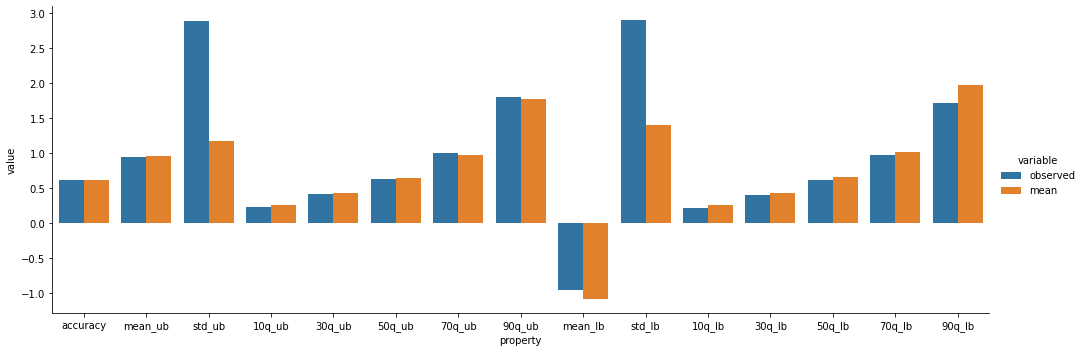

In [36]:
g1 = sns.catplot(x="property",y="value",hue="variable",data=ppc_melt,kind='bar',height=5, aspect=2.8)
g1.savefig(figure_dir+"Comparison_data_posterior_fit.png")

In [8]:
m.gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a(High - High),1.500382,0.00877,1.483466,1.494345,1.500284,1.506296,1.517581,0.000121
a(High - Low),1.757206,0.009358,1.739016,1.750892,1.75727,1.763561,1.775436,0.000113
a(Low - High),1.56671,0.008824,1.549781,1.5607,1.566636,1.572561,1.58455,0.000116
a(Low - Low),1.917107,0.0106,1.896489,1.909973,1.91696,1.924351,1.938016,0.000134
a(No - High),1.57696,0.009335,1.558666,1.570607,1.576889,1.58342,1.595334,0.000104
a(No - Low),1.840197,0.009907,1.821028,1.833477,1.840284,1.846905,1.859727,0.000123
v(High - High),0.149705,0.018259,0.113774,0.137405,0.149854,0.162183,0.184903,0.000197
v(High - Low),0.168869,0.013961,0.141615,0.159268,0.168915,0.178413,0.195956,0.000152
v(Low - High),0.314261,0.01724,0.280236,0.302634,0.314329,0.325826,0.348123,0.000176
v(Low - Low),0.369876,0.013677,0.342928,0.360605,0.369901,0.378993,0.396651,0.00016


In [37]:
v_HH, v_HL, v_LH,v_LL, v_NH,v_NL = m.nodes_db.node[['v(High - High)', 'v(High - Low)', 'v(Low - High)','v(Low - Low)','v(No - High)','v(No - Low)']]

In [38]:
a_HH, a_HL, a_LH,a_LL, a_NH,a_NL = m.nodes_db.node[['a(High - High)', 'a(High - Low)', 'a(Low - High)','a(Low - Low)','a(No - High)','a(No - Low)']]

<Figure size 720x720 with 0 Axes>

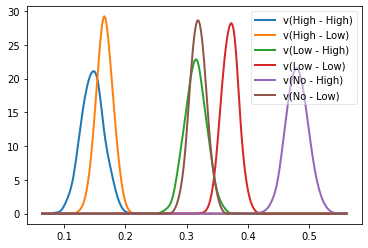

In [39]:
hddm.analyze.figure(figsize=(10,10))
hddm.analyze.plot_posterior_nodes([v_HH, v_HL, v_LH,v_LL, v_NH,v_NL])
pl.savefig(figure_dir+"drift_rates_vs_conflict_volatility_"+str(seed)+".png")

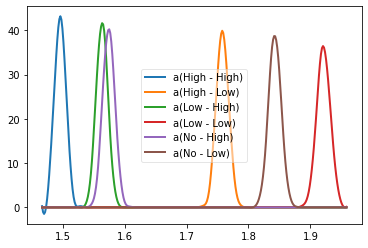

In [40]:
hddm.analyze.plot_posterior_nodes([a_HH, a_HL, a_LH,a_LL, a_NH,a_NL])
pl.savefig(figure_dir+"thresholds_vs_conflict_volatility_"+str(seed)+".png")

In [41]:
# m.plot_posteriors()

In [42]:
models = dict()
models['stats'] = m.gen_stats()
models['traces'] = m.get_traces()
models['model'] = m.get_average_model()


pickle.dump(models,open(data_target_dir+"model_ddm_"+str(seed)+'.pickle','wb'))

No model attribute --> setting up standard HDDM
Set model to ddm


In [43]:
m.get_traces()

,a(High - High),a(High - Low),a(Low - High),a(Low - Low),a(No - High),a(No - Low),v(High - High),v(High - Low),v(Low - High),v(Low - Low),v(No - High),v(No - Low),t
0,1.512360,1.753679,1.564966,1.914680,1.588346,1.840013,0.171410,0.162776,0.303102,0.384839,0.477352,0.318835,0.066909
1,1.489027,1.749853,1.567830,1.889486,1.582555,1.830617,0.129219,0.148423,0.282021,0.340555,0.486763,0.323759,0.068048
2,1.493597,1.756516,1.549875,1.923347,1.576403,1.831003,0.156385,0.191718,0.293325,0.355491,0.459535,0.324443,0.067724
3,1.500987,1.759456,1.550158,1.912255,1.584430,1.828433,0.145654,0.188922,0.281625,0.372805,0.474139,0.314666,0.068545
4,1.497016,1.743415,1.551406,1.920204,1.561833,1.825989,0.154508,0.165450,0.301509,0.361871,0.501610,0.316007,0.068676
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1.509525,1.754495,1.562389,1.910125,1.557721,1.820682,0.157926,0.166967,0.290878,0.364499,0.475018,0.313936,0.068743
8996,1.508480,1.746249,1.559449,1.928665,1.579376,1.819032,0.153630,0.169891,0.300899,0.368328,0.464447,0.315843,0.068934
8997,1.505894,1.736496,1.556522,1.902693,1.565926,1.844926,0.143888,0.167291,0.327334,0.371668,0.478286,0.310601,0.067333
8998,1.492354,1.748424,1.581694,1.905116,1.577574,1.841257,0.154635,0.147583,0.328468,0.366890,0.480227,0.319260,0.068603


In [44]:
m.

SyntaxError: invalid syntax (2562067747.py, line 1)

In [45]:
m1 = pickle.load(open(data_target_dir+"model_ddm_"+str(seed)+'.pickle','rb'))

In [ ]:
m1